# Logistic Regression with non-linear features

## import library

In [394]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [395]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1        = np.genfromtxt(fname_data1, delimiter=',')
data2        = np.genfromtxt(fname_data2, delimiter=',')

number_data1 = data1.shape[0]
number_data2 = data2.shape[0]

data1_point     = data1[:, 0:2]
data1_point_x   = data1_point[:, 0]
data1_point_y   = data1_point[:, 1]
data1_label     = data1[:, 2]

data2_point     = data2[:, 0:2]
data2_point_x   = data2_point[:, 0]
data2_point_y   = data2_point[:, 1]
data2_label     = data2[:, 2]

data1_label_class_0     = (data1_label == 0)
data1_label_class_1     = (data1_label == 1)

data2_label_class_0     = (data2_label == 0)
data2_label_class_1     = (data2_label == 1)

data1_point_x_class_0   = data1_point_x[data1_label_class_0]
data1_point_y_class_0   = data1_point_y[data1_label_class_0]

data1_point_x_class_1   = data1_point_x[data1_label_class_1]
data1_point_y_class_1   = data1_point_y[data1_label_class_1]

data2_point_x_class_0   = data2_point_x[data2_label_class_0]
data2_point_y_class_0   = data2_point_y[data2_label_class_0]

data2_point_x_class_1   = data2_point_x[data2_label_class_1]
data2_point_y_class_1   = data2_point_y[data2_label_class_1]

print('shape of point in data1 = ', data1_point.shape)
print('shape of point in data2 = ', data2_point.shape)

print('shape of label in data1 = ', data1_label.shape)
print('shape of label in data2 = ', data2_label.shape)

print('data type of point x in data1 = ', data1_point_x.dtype)
print('data type of point y in data1 = ', data1_point_y.dtype)

print('data type of point x in data2 = ', data2_point_x.dtype)
print('data type of point y in data2 = ', data2_point_y.dtype)


shape of point in data1 =  (1000, 2)
shape of point in data2 =  (1000, 2)
shape of label in data1 =  (1000,)
shape of label in data2 =  (1000,)
data type of point x in data1 =  float64
data type of point y in data1 =  float64
data type of point x in data2 =  float64
data type of point y in data2 =  float64


## plot the data

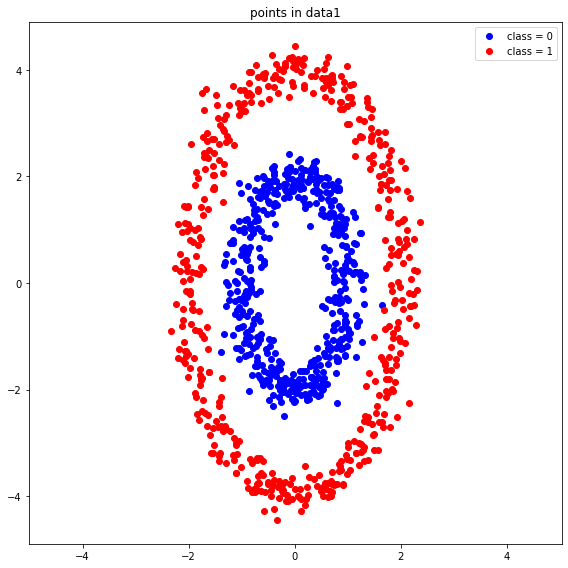

In [396]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data1')
plt.plot(data1_point_x_class_0, data1_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data1_point_x_class_1, data1_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

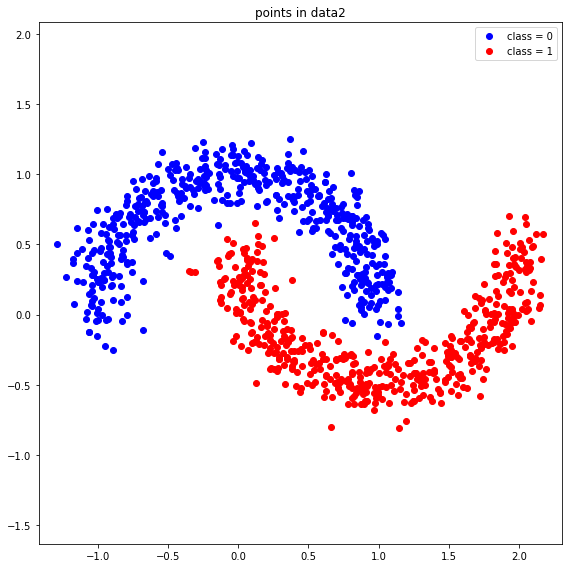

In [397]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data2')
plt.plot(data2_point_x_class_0, data2_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data2_point_x_class_1, data2_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [398]:
def compute_feature1(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    point_x   = point[:, 0]
    point_y   = point[:, 1]

    
    feature = np.array([[1,x*x,y*y] for x, y in zip(point_x, point_y)], dtype = float)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature

In [399]:
def compute_feature2(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    point_x   = point[:, 0]
    point_y   = point[:, 1]


    
    feature = np.array([[1,x,y,33*x**2,32*x**3,x**5] for x, y in zip(point_x, point_y)], dtype = float)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [400]:
def compute_linear_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    value = theta.T@feature.T


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define sigmoid function with input

- $z \in \mathbb{R}$

In [401]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    value = 1/(1+np.exp(-z))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [402]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    value = sigmoid(compute_linear_regression(theta, feature))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [403]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    residual = np.zeros(shape=(len(label)))

    regression = compute_logistic_regression(theta,feature)

    residual = -label*np.log1p(regression)-(1-label)*np.log1p(1-regression)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [404]:
def compute_loss(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    loss = np.sum( compute_residual(theta, feature, label) ) / len(label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [405]:
def compute_gradient(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    logistic = compute_logistic_regression(theta, feature)

    gradient = np.zeros(shape=(len(label)))

    gradient = ((logistic - label).T @ feature) / len(label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient

## compute the accuracy of the prediction for point with a given model parameter

In [406]:
def compute_accuracy(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    logistic = compute_logistic_regression(theta, feature)
    hit = 0

    for currLabel in label[logistic>0.5]:
        if currLabel==1:
            hit+=1
            
    for currLabel in label[logistic<0.5]:
        if currLabel==0:
            hit+=1

    accuracy = hit/len(label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy

## initialize the gradient descent algorithm

In [407]:
data1_number_iteration   = 10000
data2_number_iteration   = 30000

data1_learning_rate   = 0.1 
data2_learning_rate   = 0.1

data1_number_feature    = 3
data2_number_feature    = 6

theta1  = np.zeros(data1_number_feature)
theta2  = np.zeros(data2_number_feature)

data1_loss_iteration  = np.zeros(data1_number_iteration)
data2_loss_iteration  = np.zeros(data2_number_iteration)

data1_accuracy_iteration    = np.zeros(data1_number_iteration)
data2_accuracy_iteration    = np.zeros(data2_number_iteration)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [408]:
for i in range(data1_number_iteration):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    theta1      = theta1 - data1_learning_rate*compute_gradient(theta1,compute_feature1(data1_point), data1_label)
    loss1       = compute_loss(theta1, compute_feature1(data1_point), data1_label )
    accuracy1   = compute_accuracy(theta1, compute_feature1(data1_point), data1_label )

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data1_loss_iteration[i]     = loss1
    data1_accuracy_iteration[i] = accuracy1

data1_theta_optimal = theta1

In [409]:
for i in range(data2_number_iteration):
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    theta2      = theta2 - data2_learning_rate*compute_gradient(theta2,compute_feature2(data2_point), data2_label)
    loss2       = compute_loss(theta2, compute_feature2(data2_point), data2_label )
    accuracy2   = compute_accuracy(theta2, compute_feature2(data2_point), data2_label )

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data2_loss_iteration[i]     = loss2
    data2_accuracy_iteration[i] = accuracy2

data2_theta_optimal = theta2

___

___

## functions for presenting the results

___

___

In [410]:
def function_result_01():

    print("final loss for data1 = {:13.10f}".format(data1_loss_iteration[-1]))

In [411]:
def function_result_02():
    print("final loss for data2 = {:13.10f}".format(data2_loss_iteration[-1]))

In [412]:
def function_result_03():

    print("final accuracy for data1 = {:13.10f}".format(data1_accuracy_iteration[-1]))

In [413]:
def function_result_04():

    print("final accuracy for data2 = {:13.10f}".format(data2_accuracy_iteration[-1]))

In [414]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('loss for data1')

    plt.plot(data1_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [415]:
def function_result_06():

    plt.figure(figsize=(8,6))
    plt.title('loss for data2')

    plt.plot(data2_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [416]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data1')

    plt.plot(data1_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [417]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data2')

    plt.plot(data2_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [428]:
def function_result_09():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    pointList = np.array( [XX.flatten(), YY.flatten()] ).T
    regression = compute_linear_regression(theta1, compute_feature1(pointList))
    regression = np.reshape(regression, (-1,len(X)))

    plt.plot(XX[abs(regression-0.05) < 0.5], YY[abs(regression-0.05) < 0.5], '.', color = 'black')
    plt.scatter(XX, YY, c = regression, cmap = 'RdBu_r')
    plt.colorbar()
    
    plt.plot(data1_point_x[data1_label==0], data1_point_y[data1_label==0], '.', color = 'blue', label = 'class = 0')
    plt.plot(data1_point_x[data1_label==1], data1_point_y[data1_label==1], '.', color = 'red', label = 'class = 1')

    # #
    # # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()



In [436]:
def function_result_10():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    pointList = np.array( [XX.flatten(), YY.flatten()] ).T
    regression = compute_linear_regression(theta2, compute_feature2(pointList))
    regression = np.reshape(regression, (-1,len(X)))

    plt.plot(XX[abs(regression-0.5) < 3], YY[abs(regression-0.5) < 3], '.', color = 'black')
    plt.scatter(XX, YY, c = regression, cmap = 'RdBu_r')
    plt.colorbar()
    
    plt.plot(data2_point_x[data2_label==0], data2_point_y[data2_label==0], '.', color = 'blue', label = 'class = 0')
    plt.plot(data2_point_x[data2_label==1], data2_point_y[data2_label==1], '.', color = 'red', label = 'class = 1')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()


## plot the logistic regression values over the 2-dimensional Euclidean space

In [425]:
def function_result_11():
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    pointList = np.array( [XX.flatten(), YY.flatten()] ).T
    logistic = compute_logistic_regression(theta1, compute_feature1(pointList))
    logistic = np.reshape(logistic, (-1,len(X)))

    plt.plot(XX[abs(logistic-0.5) < 0.06], YY[abs(logistic-0.5) < 0.06], '.', color = 'black')
    plt.scatter(XX, YY, c = logistic, cmap = 'RdBu_r')
    plt.colorbar()
    
    plt.plot(data1_point_x[data1_label==0], data1_point_y[data1_label==0], '.', color = 'blue', label = 'class = 0')
    plt.plot(data1_point_x[data1_label==1], data1_point_y[data1_label==1], '.', color = 'red', label = 'class = 1')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [426]:
def function_result_12():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')

    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    pointList = np.array( [XX.flatten(), YY.flatten()] ).T
    logistic = compute_logistic_regression(theta2, compute_feature2(pointList))
    logistic = np.reshape(logistic, (-1,len(X)))

    plt.plot(XX[abs(logistic-0.5) < 0.06], YY[abs(logistic-0.5) < 0.06], '.', color = 'black')
    plt.scatter(XX, YY, c = logistic, cmap = 'RdBu_r')
    plt.colorbar()
    
    plt.plot(data2_point_x[data2_label==0], data2_point_y[data2_label==0], '.', color = 'blue', label = 'class = 0')
    plt.plot(data2_point_x[data2_label==1], data2_point_y[data2_label==1], '.', color = 'red', label = 'class = 1')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
final loss for data1 = -0.6879192938
**************************************************
## [RESULT 02]
**************************************************
final loss for data2 = -0.6873842915
**************************************************
## [RESULT 03]
**************************************************
final accuracy for data1 =  0.9990000000
**************************************************
## [RESULT 04]
**************************************************
final accuracy for data2 =  0.9990000000
**************************************************
## [RESULT 05]
**************************************************


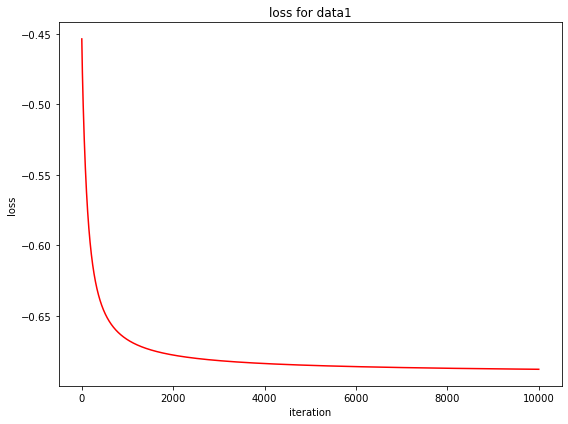

**************************************************
## [RESULT 06]
**************************************************


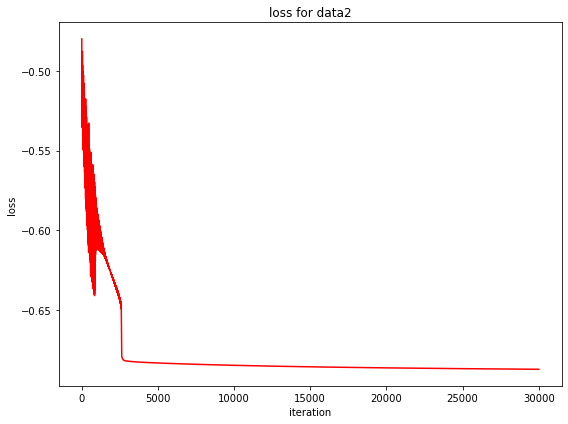

**************************************************
## [RESULT 07]
**************************************************


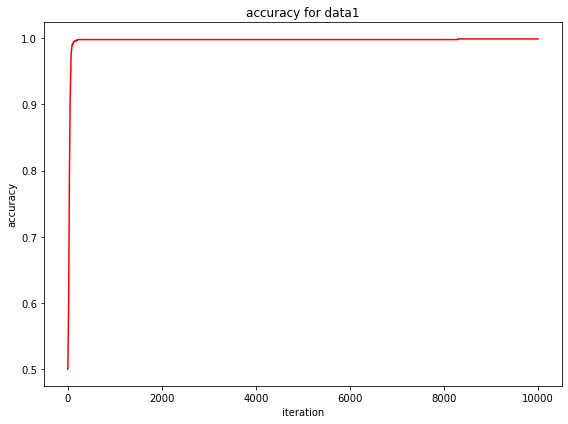

**************************************************
## [RESULT 08]
**************************************************


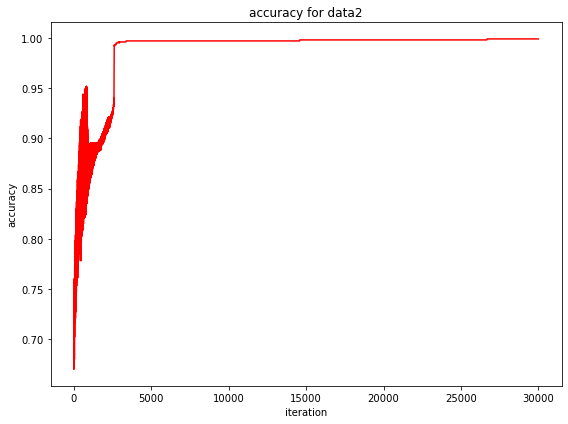

**************************************************
## [RESULT 09]
**************************************************


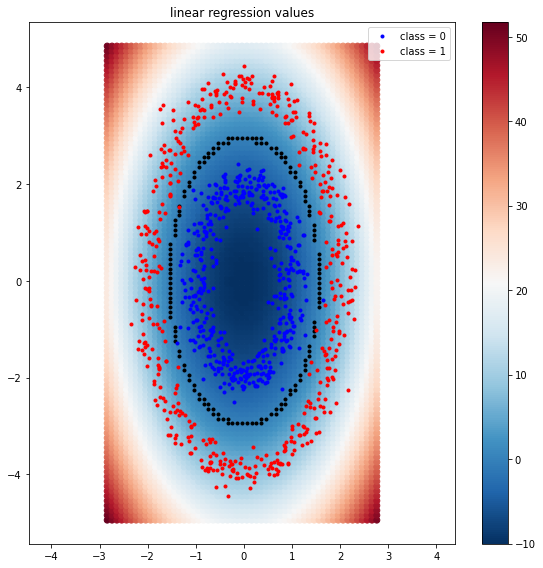

**************************************************
## [RESULT 10]
**************************************************


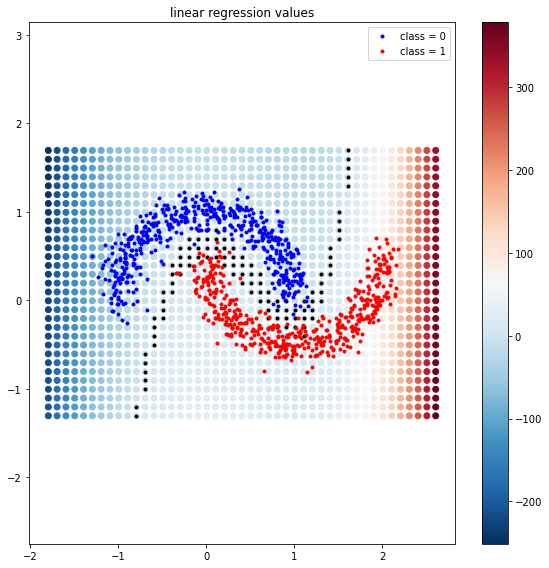

**************************************************
## [RESULT 11]
**************************************************


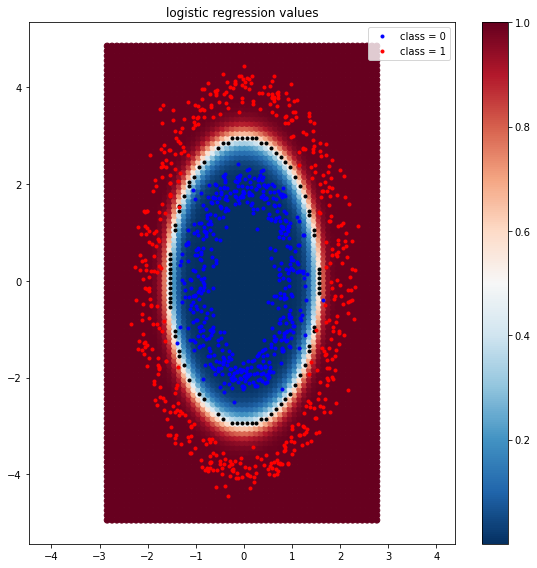

**************************************************
## [RESULT 12]
**************************************************


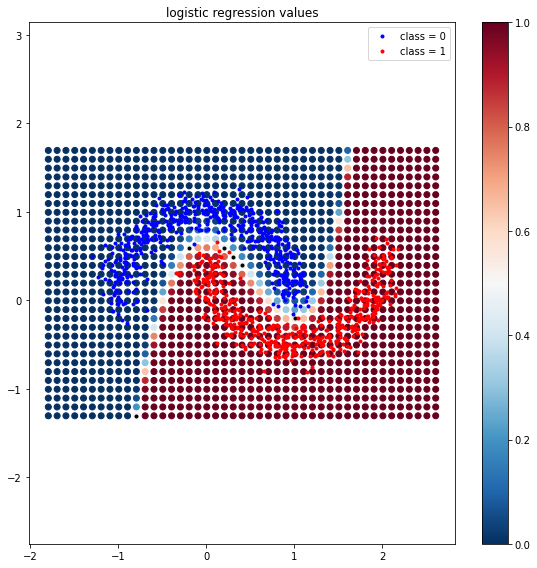

In [437]:
number_result = 12

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)